In [1]:
import numpy as np
import pandas as pd 
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
#pd.options.display.max_rows = None
#pd.options.display.max_columns = None

In [2]:
game = pd.read_csv('game_info.csv') 

In [3]:
display(game.head(1))
print (game.shape)

,id,slug,name,metacritic,released,tba,updated,website,rating,rating_top,...,developers,genres,publishers,esrb_rating,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing
0,1,dgeneration-hd,D/Generation HD,NaN,2015-10-23,False,2019-09-17T11:58:57,http://dgeneration.net,0.0,0,...,West Coast Software||West Coast Software Limited,Adventure||Puzzle,West Coast Software||West Coast Software Limited,Everyone 10+,3,70,0,2,0,0


(345667, 27)


In [4]:
game.isnull().sum()

id                           0
slug                         2
name                         2
metacritic              342428
released                 27201
tba                          0
updated                      0
website                 284812
rating                       0
rating_top                   0
playtime                     0
achievements_count           0
ratings_count                0
suggestions_count            0
game_series_count            0
reviews_count                0
platforms                 3391
developers                6236
genres                   67190
publishers              214606
esrb_rating             290551
added_status_yet             0
added_status_owned           0
added_status_beaten          0
added_status_toplay          0
added_status_dropped         0
added_status_playing         0
dtype: int64

# Cleaning

In [6]:
# Fill missing value 
#for i in range (0,game.shape[0]):
#    if pd.isnull(game['developers'][i]):
#        game['developers'][i] = game['publishers'][i]

In [7]:
# Dropping missing datas more than 80%
game.drop(['id','metacritic','released','esrb_rating',
           'updated','developers','publishers','website'],axis = 1,inplace = True)
# Dropping not meaningful data 
game.drop(['slug'],axis = 1,inplace = True)
# Dropping the game without name
game = game[~game['name'].isnull()].reset_index(drop=True)

In [8]:
# Replace the missing value with unknown instead of Null value 
game['genres'] = game['genres'].fillna('unknown_genre')
game['platforms'] = game['platforms'].fillna('unknown_plat')
#game['developers'] = game['developers'].fillna('unknown')

In [9]:
for i in range (0,len(game.isnull().sum())):
    if game.isnull().sum()[i] == 0:
        continue
    else:
        print('unclean')
print('clean')

clean


In [10]:
#game['updated'] = pd.to_datetime(game['updated'])
genres = game['genres'].str.get_dummies('|')
platforms = game['platforms'].str.get_dummies('|')
game['tba'] = game['tba'].map({False: '0',True:'1'})

In [11]:
game = game.join(genres)
game = game.join(platforms)
game.drop(['genres','platforms'],axis = 1,inplace = True)

In [12]:
game.head(10)

,name,tba,rating,rating_top,playtime,achievements_count,ratings_count,suggestions_count,game_series_count,reviews_count,...,Web,Wii,Wii U,Xbox,Xbox 360,Xbox One,iOS,mac,macOS,unknown_plat
0,D/Generation HD,0,0.0,0,1,80,0,283,0,0,...,0,0,0,0,0,1,0,0,1,0
1,G Prime Into The Rain,0,0.0,0,0,26,0,375,0,0,...,0,0,0,0,0,1,0,0,1,0
2,Land Sliders,0,0.0,0,0,0,1,71,0,1,...,0,0,0,0,0,0,1,0,0,0
3,Pixel Gear,0,0.0,0,0,0,0,443,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Gods and Idols,0,0.0,0,1,0,4,268,0,4,...,0,0,0,0,0,0,0,0,0,0
5,Plague venue,0,0.0,0,0,0,0,45,0,0,...,1,0,0,0,0,0,0,0,0,0
6,The Moon Sliver (itch),0,0.0,0,0,0,0,121,0,0,...,0,0,0,0,0,0,0,0,1,0
7,Red Entity,0,0.0,0,0,0,0,33,0,0,...,0,0,0,0,0,0,0,0,1,0
8,Rollman (itch),0,0.0,0,0,0,0,131,0,0,...,0,0,0,0,0,0,0,0,0,0
9,HippiesVsCops,0,0.0,0,0,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#game['rating'].unique()

# EDA

In [15]:
genres_list = list(genres.columns.values.tolist())
genres_counts = []
for i in genres_list:
    count = game[i].value_counts()[1]
    genres_counts.append(count)

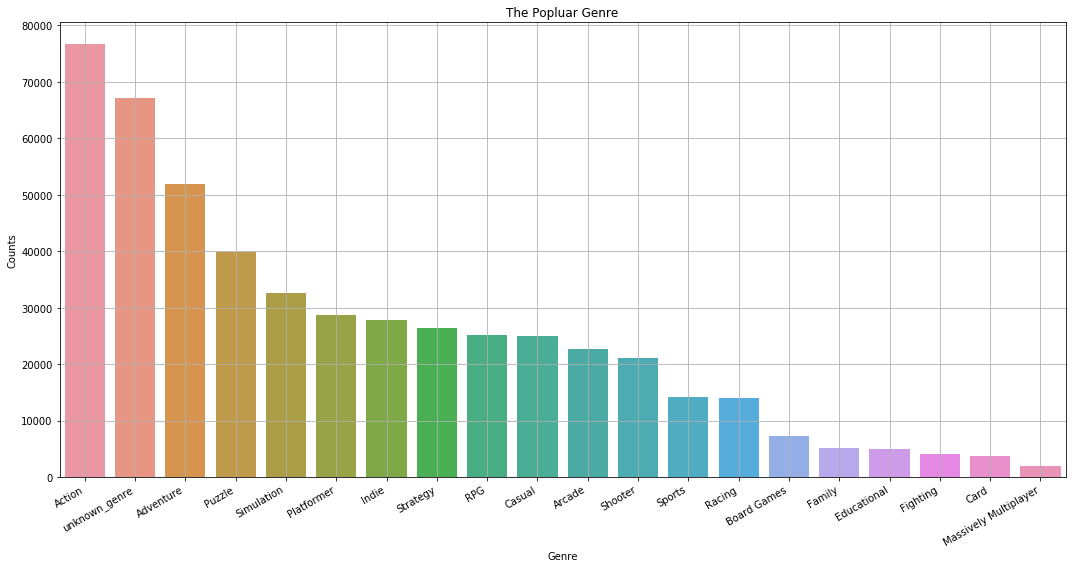

In [16]:
plot1 = pd.DataFrame({'Genre' : genres_list , 'Counts' : genres_counts})
plot1 = plot1.sort_values('Counts',ascending=False)
plt.figure(figsize = (15,8))
sns.barplot(x=plot1['Genre'], y=plot1['Counts']).set_title("The Popluar Genre")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.grid()
plt.show()

In [17]:
platforms_list = list(platforms.columns.values.tolist())
platforms_counts = []
for i in platforms_list:
    count = game[i].value_counts()[1]
    platforms_counts.append(count)

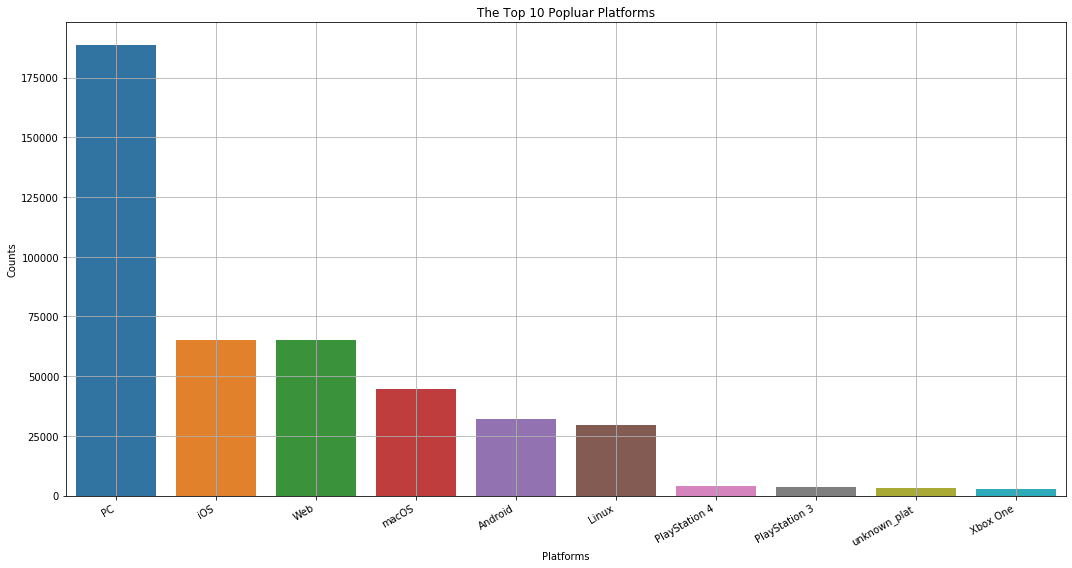

In [18]:
plot2 = pd.DataFrame({'Platforms' : platforms_list , 'Counts' : platforms_counts})
plot2 = plot2.sort_values('Counts',ascending=False)
plt.figure(figsize = (15,8))
sns.barplot(x=plot2['Platforms'][0:10], y=plot2['Counts'][0:10]).set_title("The Top 10 Popluar Platforms")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.grid()
plt.show()

     rating
0.0  336912


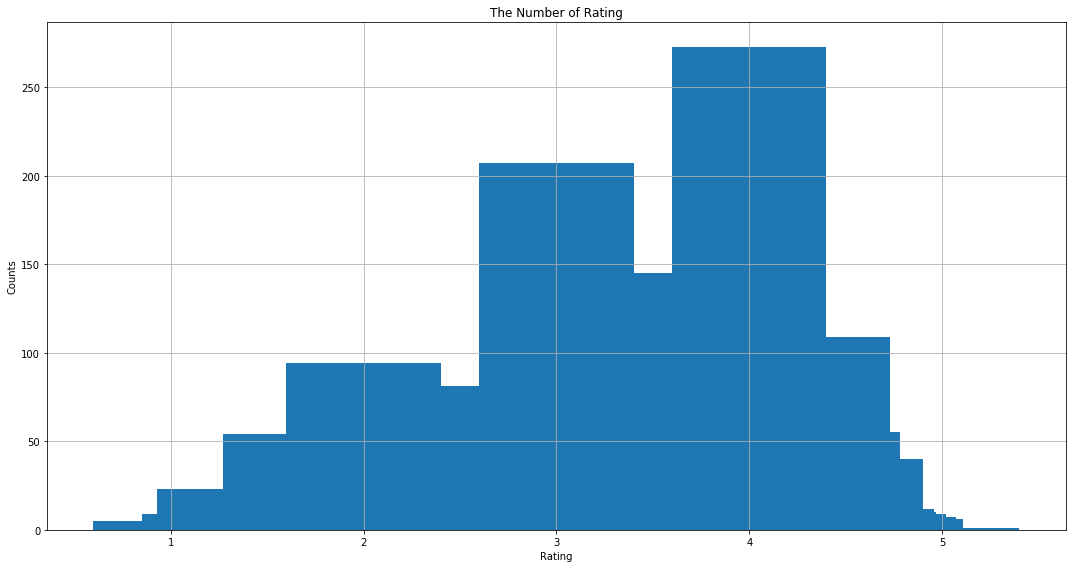

In [47]:
print(pd.DataFrame(game['rating'].loc[game['rating'] == 0.0].value_counts()))
plt.figure(figsize = (15,8))
plt.bar(game['rating'].loc[game['rating'] != 0.0].value_counts().index, 
         game['rating'].loc[game['rating'] != 0.0].value_counts().values)
plt.title('The Number of Rating')
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.tight_layout()
plt.grid()
plt.show()